# Package Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the file

In [4]:
housing_df = pd.read_excel('C:/Users/soura/Downloads/1553768847_housing.xlsx')

# Data Exploration

In [5]:
housing_df.shape

(20640, 10)

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Print first few rows of this data.

In [8]:
housing_df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Fill the missing values with the mean of the respective column

In [11]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [12]:
housing_df = housing_df.fillna(value=housing_df['total_bedrooms'].mean())

In [13]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Convert categorical column in the dataset to numerical data.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
housing_df['encoded_ocean_proximity'] = encoder.fit_transform(housing_df['ocean_proximity'])

In [19]:
housing_df['encoded_ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: encoded_ocean_proximity, dtype: int64

C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longitude', ylabel='Density'>

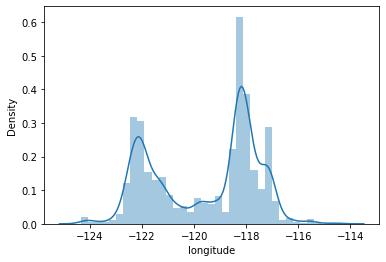

In [20]:
sns.distplot(housing_df['longitude'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude'>

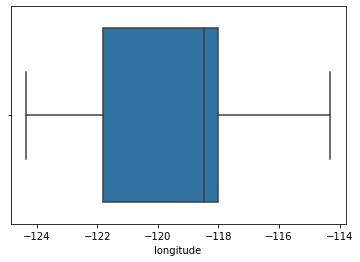

In [21]:
sns.boxplot(housing_df['longitude'])

In [22]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [23]:
l,u = outlier_treatment(housing_df['longitude'])

In [24]:
l

-127.48499999999999

In [25]:
u

-112.32500000000002

In [26]:
housing_df[(housing_df['longitude'] > u) | (housing_df['longitude'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity


C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

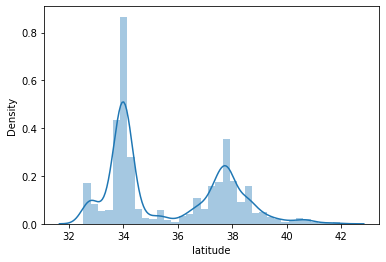

In [27]:
sns.distplot(housing_df['latitude'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude'>

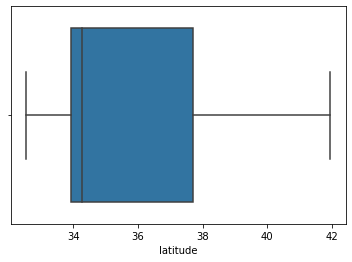

In [28]:
sns.boxplot(housing_df['latitude'])

In [29]:
l,u = outlier_treatment(housing_df['latitude'])

In [30]:
l

28.259999999999998

In [31]:
u

43.38

In [32]:
housing_df[(housing_df['latitude'] > u) | (housing_df['latitude'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity


C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

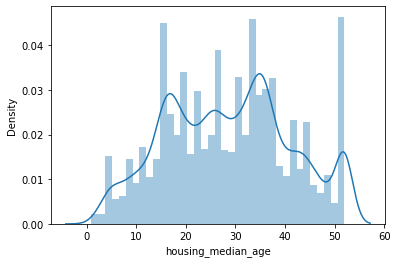

In [33]:
sns.distplot(housing_df['housing_median_age'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing_median_age'>

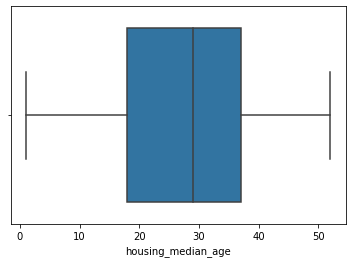

In [34]:
sns.boxplot(housing_df['housing_median_age'])

In [35]:
l,u = outlier_treatment(housing_df['housing_median_age'])

In [36]:
l

-10.5

In [37]:
u

65.5

In [38]:
housing_df[(housing_df['housing_median_age'] > u) | (housing_df['housing_median_age'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity


C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rooms', ylabel='Density'>

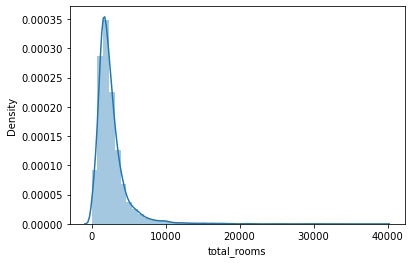

In [39]:
sns.distplot(housing_df['total_rooms'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_rooms'>

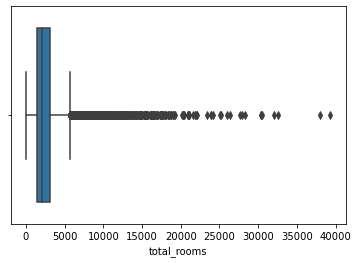

In [40]:
sns.boxplot(housing_df['total_rooms'])

In [41]:
l,u = outlier_treatment(housing_df['total_rooms'])

In [42]:
l

-1102.625

In [43]:
u

5698.375

In [44]:
housing_df[(housing_df['total_rooms'] > u) | (housing_df['total_rooms'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,3
101,-122.25,37.81,28,5806,1603.0,2563,1497,3.2177,NEAR BAY,273400,3
104,-122.26,37.81,34,5871,1914.0,2689,1789,2.8406,NEAR BAY,335700,3
185,-122.23,37.79,43,5963,1344.0,4367,1231,2.1917,NEAR BAY,112800,3
283,-122.16,37.79,22,12842,2048.0,4985,1967,5.9849,NEAR BAY,371000,3
...,...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33,6861,1820.0,3717,1767,1.7311,INLAND,182600,1
20544,-121.76,38.55,23,8800,1857.0,6330,1832,2.0650,INLAND,219400,1
20563,-121.75,38.67,9,12139,2640.0,6837,2358,3.1250,INLAND,132500,1
20567,-121.79,38.66,15,6809,1052.0,3060,1060,5.3064,INLAND,165000,1


In [45]:
housing_df.drop(housing_df[(housing_df['total_rooms'] > u) | (housing_df['total_rooms'] < l)].index,inplace=True)

In [46]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19353 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                19353 non-null  float64
 1   latitude                 19353 non-null  float64
 2   housing_median_age       19353 non-null  int64  
 3   total_rooms              19353 non-null  int64  
 4   total_bedrooms           19353 non-null  float64
 5   population               19353 non-null  int64  
 6   households               19353 non-null  int64  
 7   median_income            19353 non-null  float64
 8   ocean_proximity          19353 non-null  object 
 9   median_house_value       19353 non-null  int64  
 10  encoded_ocean_proximity  19353 non-null  int32  
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 1.7+ MB


C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

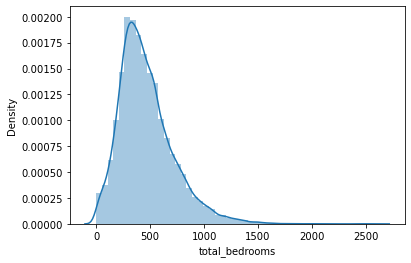

In [47]:
sns.distplot(housing_df['total_bedrooms'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bedrooms'>

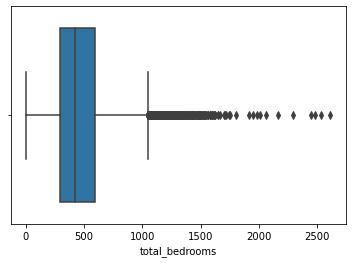

In [48]:
sns.boxplot(housing_df['total_bedrooms'])

In [49]:
l,u = outlier_treatment(housing_df['total_bedrooms'])

In [50]:
l

-165.5

In [51]:
u

1046.5

In [52]:
housing_df[(housing_df['total_bedrooms'] > u) | (housing_df['total_bedrooms'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity
95,-122.26,37.80,36,5329,2477.0,3469,2323,2.0096,NEAR BAY,130000,3
96,-122.26,37.82,31,4596,1331.0,2048,1180,2.8345,NEAR BAY,183800,3
98,-122.26,37.82,22,3682,1270.0,2024,1250,1.2185,NEAR BAY,170000,3
99,-122.26,37.82,37,3633,1085.0,1838,980,2.6104,NEAR BAY,193100,3
100,-122.25,37.81,29,4656,1414.0,2304,1250,2.4912,NEAR BAY,257800,3
...,...,...,...,...,...,...,...,...,...,...,...
20413,-118.87,34.18,21,5661,1369.0,3188,1308,3.4676,<1H OCEAN,212800,0
20509,-121.53,38.60,25,5154,1105.0,3196,1073,2.7566,INLAND,80200,1
20517,-121.54,38.58,30,4648,1252.0,2524,1089,1.3177,INLAND,74300,1
20519,-121.53,38.58,33,4988,1169.0,2414,1075,1.9728,INLAND,76400,1


In [53]:
housing_df.drop(housing_df[(housing_df['total_bedrooms'] > u) | (housing_df['total_bedrooms'] < l)].index,inplace=True)

C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population', ylabel='Density'>

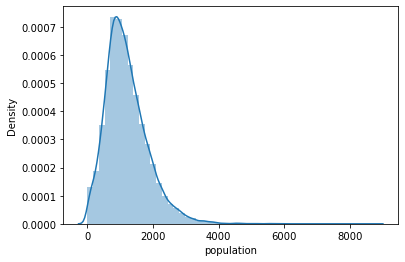

In [54]:
sns.distplot(housing_df['population'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population'>

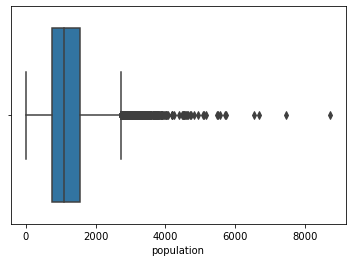

In [55]:
sns.boxplot(housing_df['population'])

In [56]:
l,u = outlier_treatment(housing_df['population'])

In [57]:
l

-426.5

In [58]:
u

2721.5

In [59]:
housing_df[(housing_df['population'] > u) | (housing_df['population'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity
204,-122.23,37.78,44,2340,825.000000,2813,751,1.6009,NEAR BAY,118100,3
330,-122.18,37.73,42,4074,874.000000,2736,780,2.4550,NEAR BAY,82400,3
460,-122.26,37.87,52,1087,371.000000,3337,350,1.4012,NEAR BAY,175000,3
536,-122.28,37.79,30,4145,869.000000,3668,855,2.5444,NEAR BAY,275000,3
538,-122.28,37.78,29,5154,537.870553,3741,1273,2.5762,NEAR BAY,173400,3
...,...,...,...,...,...,...,...,...,...,...,...
20449,-118.88,34.28,22,3369,771.000000,2751,710,4.0474,<1H OCEAN,182100,0
20460,-118.75,34.29,17,5512,537.870553,2734,814,6.6073,<1H OCEAN,258100,0
20527,-121.79,38.54,7,1777,513.000000,4479,504,1.4653,INLAND,310000,1
20569,-121.76,38.66,17,5320,984.000000,2866,928,4.1997,INLAND,133400,1


In [60]:
housing_df.drop(housing_df[(housing_df['population'] > u) | (housing_df['population'] < l)].index,inplace=True)

C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='households', ylabel='Density'>

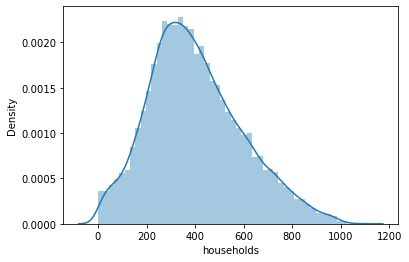

In [61]:
sns.distplot(housing_df['households'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='households'>

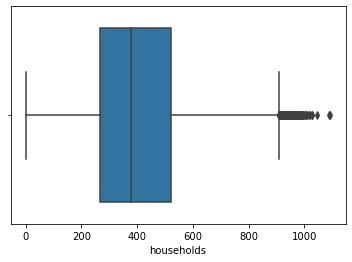

In [62]:
sns.boxplot(housing_df['households'])

In [63]:
l,u = outlier_treatment(housing_df['households'])

In [64]:
l

-119.5

In [65]:
u

908.5

In [66]:
housing_df[(housing_df['households'] > u) | (housing_df['households'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity
395,-122.34,37.88,37,3061,930.0,2556,924,1.7375,NEAR BAY,350000,3
461,-122.26,37.87,52,2773,998.0,1721,949,1.1859,NEAR BAY,241700,3
656,-122.14,37.71,18,3905,1007.0,2197,1044,3.6932,NEAR BAY,166800,3
861,-121.98,37.58,20,4126,1031.0,2079,975,3.6832,<1H OCEAN,216900,0
880,-121.99,37.56,18,5505,1005.0,2641,971,5.0000,<1H OCEAN,269700,0
...,...,...,...,...,...,...,...,...,...,...,...
20387,-118.92,34.19,16,3631,974.0,2585,923,3.0691,<1H OCEAN,130400,0
20430,-118.84,34.21,16,4975,949.0,2537,971,5.2361,<1H OCEAN,224700,0
20457,-118.77,34.28,6,4685,965.0,2180,909,4.5458,<1H OCEAN,208200,0
20545,-121.75,38.55,26,4802,950.0,2199,939,3.7452,INLAND,227700,1


In [67]:
housing_df.drop(housing_df[(housing_df['households'] > u) | (housing_df['households'] < l)].index,inplace=True)

C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_income', ylabel='Density'>

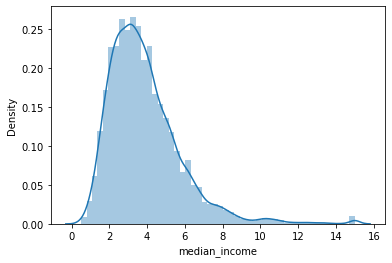

In [68]:
sns.distplot(housing_df['median_income'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_income'>

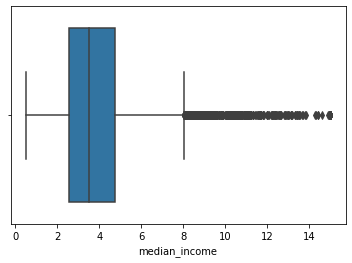

In [69]:
sns.boxplot(housing_df['median_income'])

In [70]:
l,u = outlier_treatment(housing_df['median_income'])

In [71]:
l

-0.7430250000000007

In [72]:
u

8.023575000000001

In [73]:
housing_df[(housing_df['median_income'] > u) | (housing_df['median_income'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,3
131,-122.19,37.84,18,1617,210.0,533,194,11.6017,NEAR BAY,392600,3
134,-122.19,37.83,28,1326,184.0,463,190,8.2049,NEAR BAY,335200,3
135,-122.20,37.83,26,1589,223.0,542,211,8.4010,NEAR BAY,351200,3
137,-122.19,37.82,32,1835,264.0,635,263,8.3170,NEAR BAY,365900,3
...,...,...,...,...,...,...,...,...,...,...,...
20389,-118.90,34.19,26,1582,196.0,573,182,10.0595,<1H OCEAN,500001,0
20421,-118.83,34.17,17,4668,628.0,1917,624,8.1397,<1H OCEAN,353900,0
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,<1H OCEAN,500001,0
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,<1H OCEAN,500001,0


In [74]:
housing_df.drop(housing_df[(housing_df['median_income'] > u) | (housing_df['median_income'] < l)].index,inplace=True)

C:\Users\soura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='encoded_ocean_proximity', ylabel='Density'>

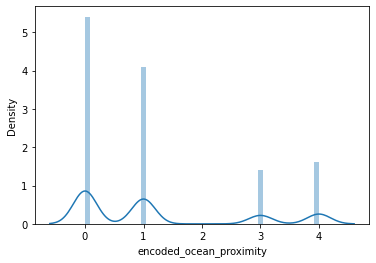

In [75]:
sns.distplot(housing_df['encoded_ocean_proximity'])

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='encoded_ocean_proximity'>

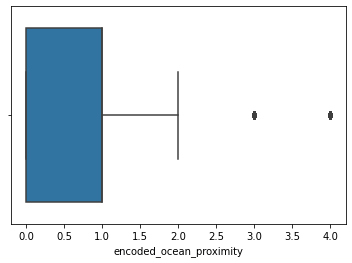

In [76]:
sns.boxplot(housing_df['encoded_ocean_proximity'])

In [77]:
l,u = outlier_treatment(housing_df['encoded_ocean_proximity'])

In [78]:
l

-1.5

In [79]:
u

2.5

In [80]:
housing_df[(housing_df['encoded_ocean_proximity'] > u) | (housing_df['encoded_ocean_proximity'] < l)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,encoded_ocean_proximity
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,3
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700,3
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200,3
...,...,...,...,...,...,...,...,...,...,...,...
20353,-119.05,34.13,12,57,22.0,69,15,5.0066,NEAR OCEAN,275000,4
20378,-118.82,34.15,9,655,110.0,222,109,7.8528,NEAR OCEAN,337500,4
20379,-118.83,34.15,16,3380,731.0,1227,641,4.2857,NEAR OCEAN,233200,4
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,NEAR OCEAN,321800,4


In [81]:
housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,encoded_ocean_proximity
longitude,1.000000,-0.923005,-0.090002,-0.015726,0.023122,0.107404,0.021183,-0.002359,-0.033398,-0.283519
latitude,-0.923005,1.000000,-0.013074,0.013556,-0.035875,-0.134129,-0.059086,-0.097565,-0.161411,0.191070
housing_median_age,-0.090002,-0.013074,1.000000,-0.267054,-0.199639,-0.177887,-0.170602,-0.138689,0.130362,0.106755
total_rooms,-0.015726,0.013556,-0.267054,1.000000,0.874093,0.755103,0.873021,0.301559,0.188777,0.010541
total_bedrooms,0.023122,-0.035875,-0.199639,0.874093,1.000000,0.803070,0.960013,-0.016010,0.081312,0.028218
population,0.107404,-0.134129,-0.177887,0.755103,0.803070,1.000000,0.854431,0.000513,-0.051527,-0.090100
households,0.021183,-0.059086,-0.170602,0.873021,0.960013,0.854431,1.000000,0.029463,0.105354,0.019316
median_income,-0.002359,-0.097565,-0.138689,0.301559,-0.016010,0.000513,0.029463,1.000000,0.634992,-0.033109
median_house_value,-0.033398,-0.161411,0.130362,0.188777,0.081312,-0.051527,0.105354,0.634992,1.000000,0.084997
encoded_ocean_proximity,-0.283519,0.191070,0.106755,0.010541,0.028218,-0.090100,0.019316,-0.033109,0.084997,1.000000


In [82]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'encoded_ocean_proximity'],
      dtype='object')

In [83]:
housing_df.drop(['ocean_proximity'],axis=1,inplace=True)

In [84]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'encoded_ocean_proximity'],
      dtype='object')

In [85]:
new_housing_df = housing_df.iloc[:,[0,1,2,3,4,5,6,7,9,8]]

<AxesSubplot:>

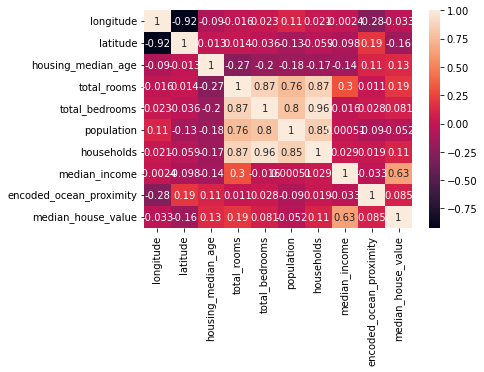

In [86]:
sns.heatmap(new_housing_df.corr(),annot=True)

In [87]:
new_housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,encoded_ocean_proximity,median_house_value
longitude,1.000000,-0.923005,-0.090002,-0.015726,0.023122,0.107404,0.021183,-0.002359,-0.283519,-0.033398
latitude,-0.923005,1.000000,-0.013074,0.013556,-0.035875,-0.134129,-0.059086,-0.097565,0.191070,-0.161411
housing_median_age,-0.090002,-0.013074,1.000000,-0.267054,-0.199639,-0.177887,-0.170602,-0.138689,0.106755,0.130362
total_rooms,-0.015726,0.013556,-0.267054,1.000000,0.874093,0.755103,0.873021,0.301559,0.010541,0.188777
total_bedrooms,0.023122,-0.035875,-0.199639,0.874093,1.000000,0.803070,0.960013,-0.016010,0.028218,0.081312
population,0.107404,-0.134129,-0.177887,0.755103,0.803070,1.000000,0.854431,0.000513,-0.090100,-0.051527
households,0.021183,-0.059086,-0.170602,0.873021,0.960013,0.854431,1.000000,0.029463,0.019316,0.105354
median_income,-0.002359,-0.097565,-0.138689,0.301559,-0.016010,0.000513,0.029463,1.000000,-0.033109,0.634992
encoded_ocean_proximity,-0.283519,0.191070,0.106755,0.010541,0.028218,-0.090100,0.019316,-0.033109,1.000000,0.084997
median_house_value,-0.033398,-0.161411,0.130362,0.188777,0.081312,-0.051527,0.105354,0.634992,0.084997,1.000000


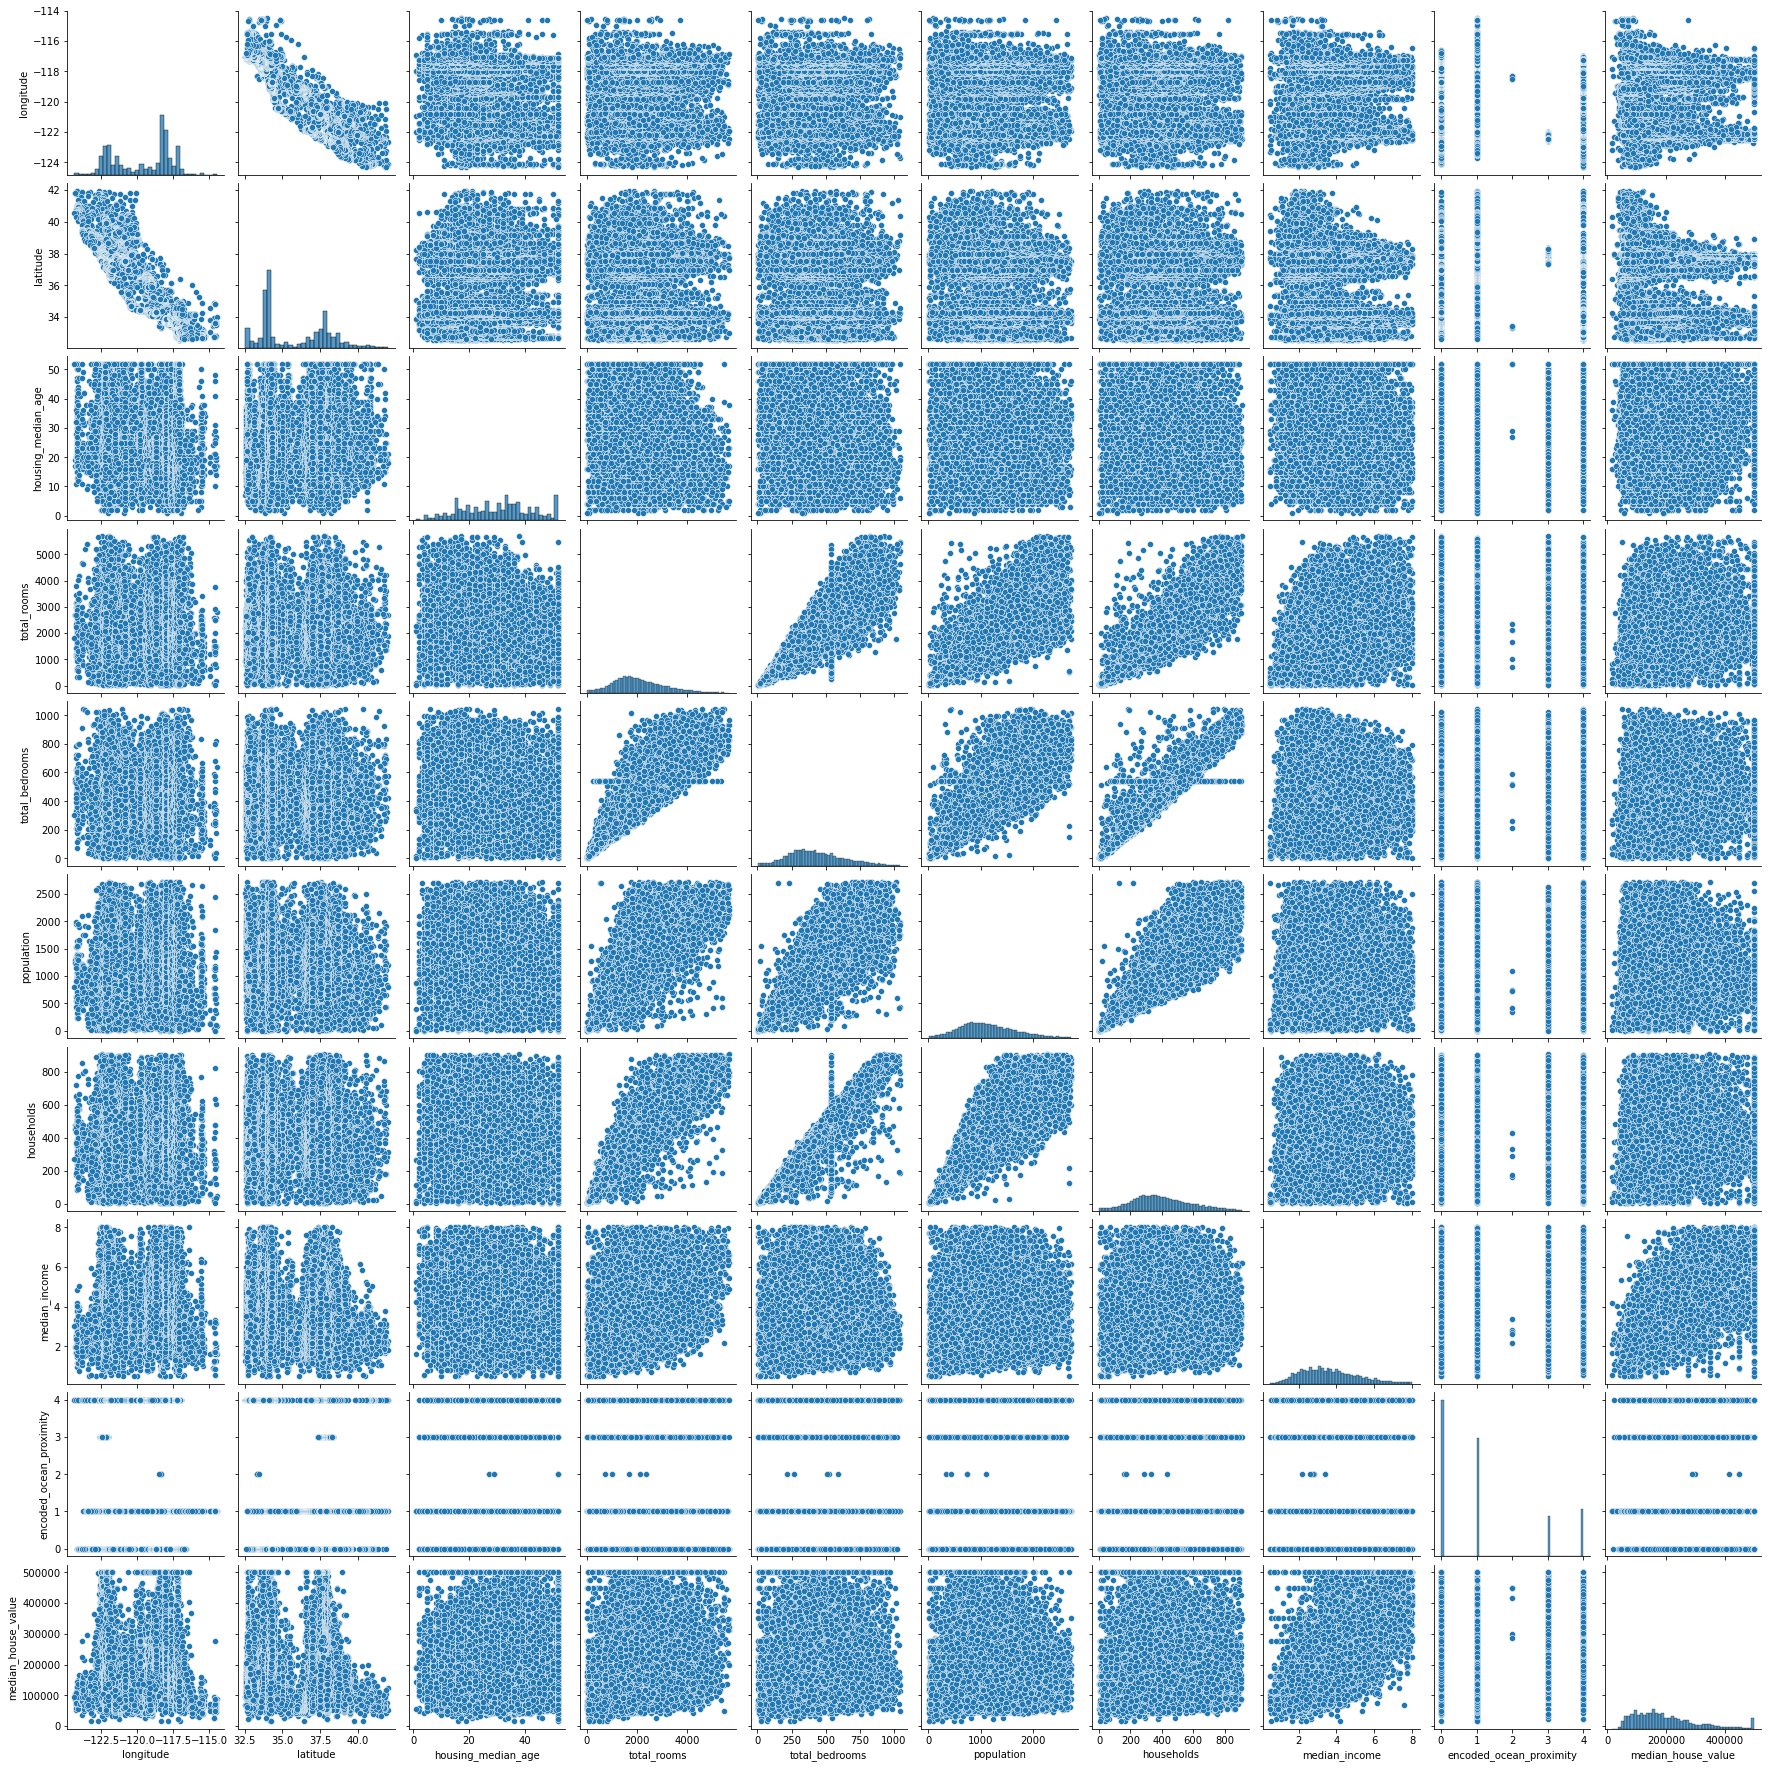

In [88]:
sns.pairplot(new_housing_df)

In [89]:
features = new_housing_df.iloc[:,0:-1].values
target = housing_df['median_house_value'].values

# Standardize training and test datasets.

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
features_transform = scaler.fit_transform(features)

In [93]:
features_transform

array([[0.21399594, 0.5642933 , 1.        , ..., 0.19315673, 0.89909392,
        0.75      ],
       [0.21298174, 0.5642933 , 1.        , ..., 0.23951435, 0.68430926,
        0.75      ],
       [0.21298174, 0.5642933 , 1.        , ..., 0.28366446, 0.44522945,
        0.75      ],
       ...,
       [0.31744422, 0.73219979, 0.31372549, ..., 0.47571744, 0.15967482,
        0.25      ],
       [0.30730223, 0.73219979, 0.33333333, ..., 0.38300221, 0.18192099,
        0.25      ],
       [0.31541582, 0.72582359, 0.29411765, ..., 0.58278146, 0.25129392,
        0.25      ]])

In [94]:
type(features_transform)

numpy.ndarray

In [95]:
type(target)

numpy.ndarray

In [96]:
features_transform.shape

(17532, 9)

In [97]:
target.shape

(17532,)

# Split the data into 80% training dataset and 20% test dataset.

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(features_transform,target,test_size=0.2,random_state=10)

In [101]:
X_train.shape

(14025, 9)

In [102]:
X_test.shape

(3507, 9)

In [103]:
y_train.shape

(14025,)

In [104]:
y_test.shape

(3507,)

# Perform Linear Regression on training data.

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lr_model = LinearRegression()

In [108]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [109]:
y_preds_lr = lr_model.predict(X_test)

# Print root mean squared error (RMSE) from Linear Regression.

In [111]:
from sklearn.metrics import r2_score,mean_squared_error

In [112]:
r2_score(y_test,y_preds_lr)

0.617244296461856

In [113]:
np.sqrt(mean_squared_error(y_test,y_preds_lr))

65002.37613733477

In [114]:
lr_model.intercept_

324202.59241090703

In [115]:
lr_model.coef_

array([-385652.66548863, -371918.56240435,   60568.9895181 ,
       -111691.0069238 ,  224444.58721517, -228496.17867836,
        115132.87263555,  341909.66728415,   -3785.02523248])

#  Bonus exercise: Perform Linear Regression with one independent variable

In [116]:
features_new = new_housing_df['median_income'].values
target_new = housing_df['median_house_value'].values

In [117]:
type(features_new)

numpy.ndarray

In [118]:
type(target_new)

numpy.ndarray

In [119]:
features_new.shape

(17532,)

In [120]:
features_new = features_new.reshape(17532,1)

In [121]:
features_new.shape

(17532, 1)

In [122]:
target_new.shape

(17532,)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test = train_test_split(features_new,target_new,test_size=0.2,random_state=10)

In [125]:
X_train.shape

(14025, 1)

In [126]:
X_test.shape

(3507, 1)

In [127]:
y_train.shape

(14025,)

In [128]:
y_test.shape

(3507,)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr_model = LinearRegression()

In [131]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [132]:
y_preds_lr = lr_model.predict(X_test)

In [133]:
from sklearn.metrics import r2_score,mean_squared_error

In [134]:
r2_score(y_test,y_preds_lr)

0.40520696193918293

In [135]:
lr_model.intercept_

29381.47404404229

In [136]:
lr_model.coef_

array([45849.37056499])